In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# **1.LOAD THE DATASET**

In [16]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("C:/Users/user/Documents/Tech/TS_ACADEMY/datasets/Mall_Customers.csv")

In [17]:
#Check for missing values and data types.
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **2. EXPLORE THE DATA**

In [19]:
# Summary statistics:.describe()
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


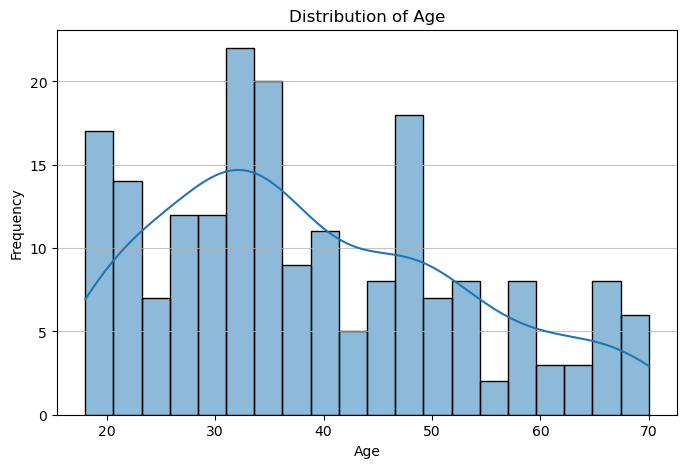

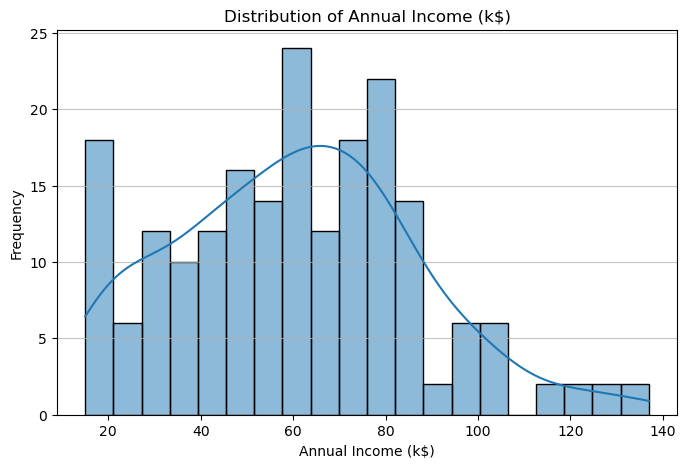

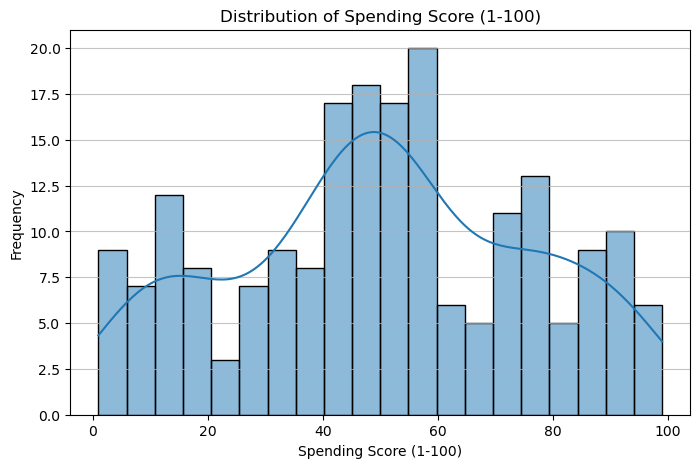

In [20]:
#Visualize distributions of Age,AnnualIncome,and Spending Score.
plot_cols = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
for col in plot_cols:
    try:
        
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(axis='y', alpha=0.75)
        plt.show()
    except Exception as e:
            print(f"Distribution Plot Error for {col}: {e}")


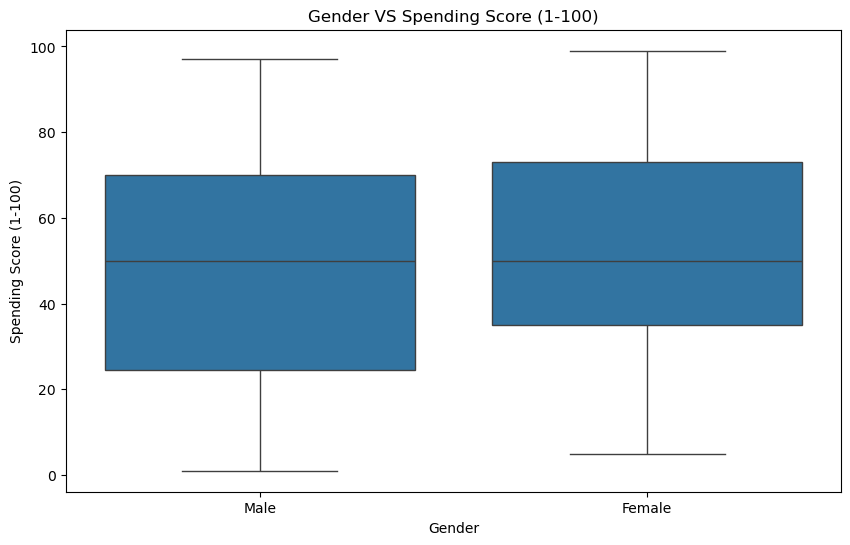

In [21]:
#Optional:Visualize Gender vs Spending Score using a boxplot.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="Spending Score (1-100)")
plt.title("Gender VS Spending Score (1-100)")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.show()

# **3. SELECT FEATURES FOR CLUSTERING**

In [22]:
# Start simple:AnnualIncome(k$) and Spending Score(1-100).
clustering_features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
clustering_features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


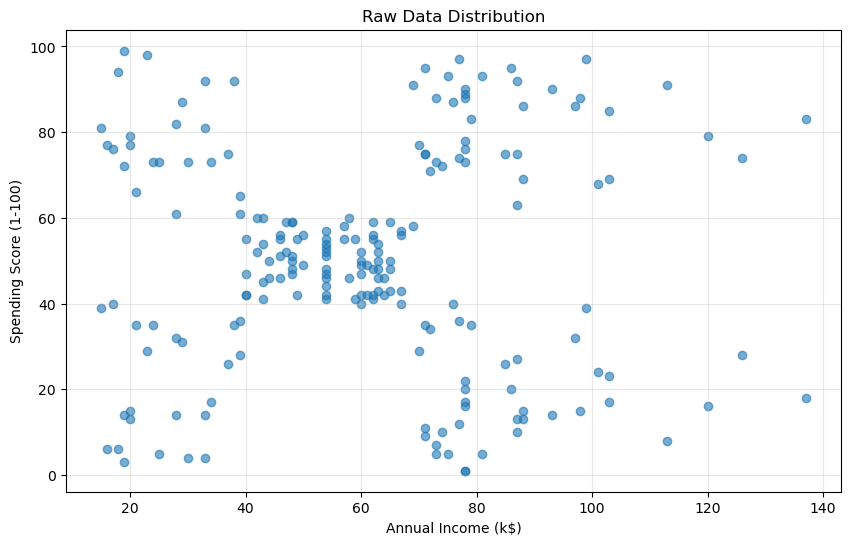

In [23]:
# Visualize the raw data
plt.figure(figsize=(10, 6))
plt.scatter(clustering_features['Annual Income (k$)'], clustering_features['Spending Score (1-100)'], alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Raw Data Distribution')
plt.grid(True, alpha=0.3) # alpha=0.3 makes the grid lines faint (semi-transparent).
plt.show()

# **4. Determine the Optimal Number of Clusters**

**Use Elbow method and Silhouette Score**

In [24]:
# ELBOW METHOD
k_range = range(2, 11)
empty_inertias = []

for k in k_range:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the model
    kmeans.fit(clustering_features)

    # Store the inertia (within-cluster sum of squares)
    empty_inertias.append(kmeans.inertia_)

    print(f"k={k}: Inertia = {kmeans.inertia_:.2f}")

k=2: Inertia = 181363.60
k=3: Inertia = 106348.37
k=4: Inertia = 73679.79
k=5: Inertia = 44448.46
k=6: Inertia = 37233.81
k=7: Inertia = 30241.34
k=8: Inertia = 25036.42
k=9: Inertia = 21916.79
k=10: Inertia = 20072.07


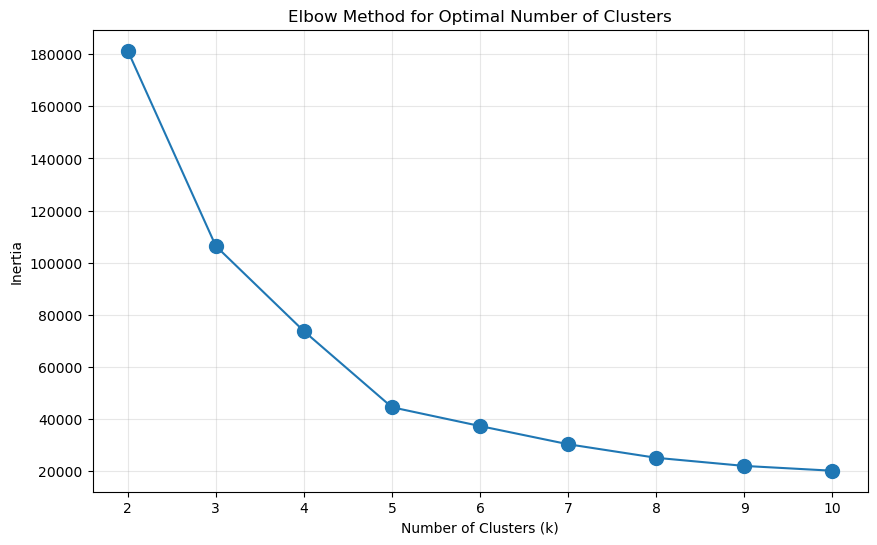

In [25]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, empty_inertias, 'o-', markersize=10)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

In [26]:
# SILHOUETTE METHOD

silhouette_scores = []

for k in k_range:
    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(clustering_features)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(clustering_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"k={k}: Silhouette Score = {silhouette_avg:.3f}")


k=2: Silhouette Score = 0.297
k=3: Silhouette Score = 0.468
k=4: Silhouette Score = 0.493
k=5: Silhouette Score = 0.554
k=6: Silhouette Score = 0.540
k=7: Silhouette Score = 0.529
k=8: Silhouette Score = 0.455
k=9: Silhouette Score = 0.456
k=10: Silhouette Score = 0.441


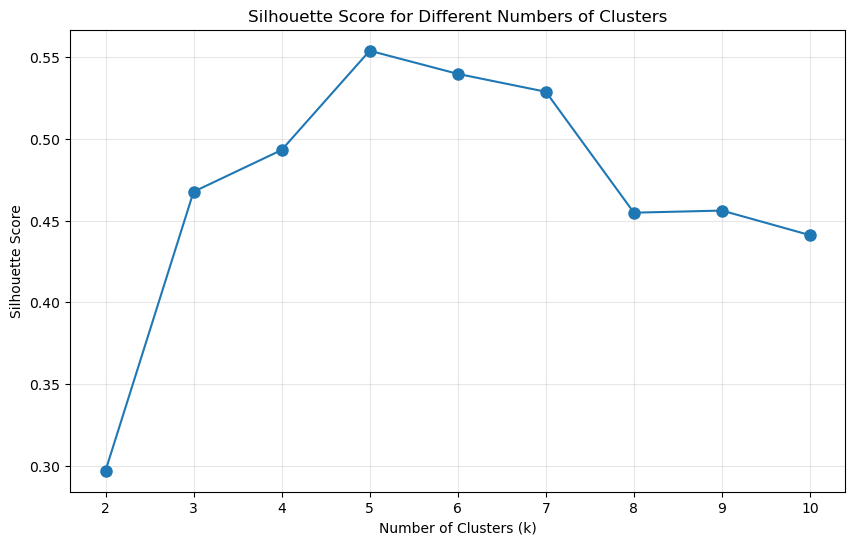

In [27]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

# **4. Build the K-Means Model**

In [28]:
# Create the final model
final_kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# Fit the model and get cluster labels
cluster_labels = final_kmeans.fit_predict(clustering_features)

In [29]:
cluster_labels[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [30]:
# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered['predicted_cluster'] = cluster_labels

In [31]:
df_clustered["predicted_cluster"].unique()

array([4, 2, 0, 1, 3], dtype=int32)

In [32]:
df_clustered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predicted_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


# **5. Visualize the Clusters**

In [33]:
# Cluster distribution
cluster_counts = pd.Series(cluster_labels).value_counts()
print(cluster_counts)

0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


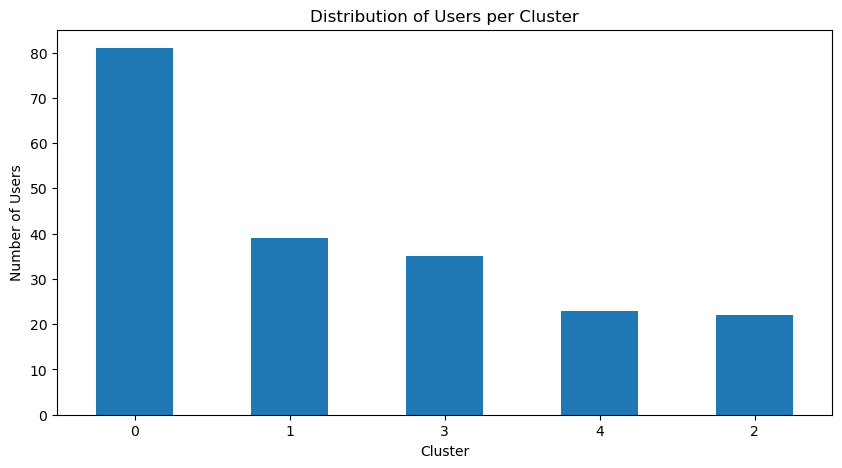

In [34]:
plt.figure(figsize=(10, 5))
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Distribution of Users per Cluster')
plt.xticks(rotation=0)
plt.show()

In [35]:
cluster_characteristics = df_clustered.groupby('predicted_cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
display(cluster_characteristics)

,Annual Income (k$),Spending Score (1-100)
predicted_cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


# **INSIGHTS**

| Cluster | Customer Type                    |
| ------- | -------------------------------- |
| 0       | Average mainstream customers     |
| 1       | High-value VIP customers         |
| 2       | Impulsive, high-spend low-income |
| 3       | Wealthy but conservative         |
| 4       | Budget-limited customers         |
